In [1]:
#import modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys
import h5py
import tensorflow.compat.v1 as tf
import tensorflow as tf2

from DlModels import DlModels
from TrainDL import TrainDL
from DataLoader import DataLoader

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
tf.config.list_physical_devices('GPU')
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.keras.backend.set_floatx('float32') #for memory use

In [ ]:
data_loader = DataLoader('17_point_centered.hdf5')
%matplotlib inline  
i=0
obj = []
for image, output in data_loader.load_all():
    if i==0:
        obj = plt.imshow(image[:,:,0])
    else:
        obj.set_data(image)
    plt.show()


In [2]:
#import modules
epochs = 50
batch_size = 70
base_learning_rate = 0.001
learning_decay_rate = 7
learning_decay_factor = 0.75
data_loader = DataLoader('17_point_centered.hdf5')
data_loader.divide_data()

tf.compat.v1.disable_eager_execution()
input_image = tf.placeholder(tf.float32, [None, None, None, None, 1], name='input_image')
initial_hidden_state = tf.placeholder(tf.float32, [None, 29, 39, 20], name='initial_hidden_state')
initial_carry_state = tf.placeholder(tf.float32, [None, 29, 39, 20], name='initial_carry_state')
#initial_hidden_state = tf.placeholder(tf.float32, [None, 10, 13, 20], name='initial_hidden_state')
#initial_carry_state = tf.placeholder(tf.float32, [None, 10, 13, 20], name='initial_carry_state')
#grount_truth = tf.placeholder(tf.float32, [None, None, 18])
grount_truth = tf.placeholder(tf.float32, [None, None, 18], name='ground_truth')
learning_rate = tf.placeholder(tf.float32, shape=(), name='learning_rate')

sess = tf.Session()

# Build NN using load_vgg, layers, and optimize function
#nn_last_layer, hidden_state, carry_state = DlModels.Conv2dx2LSTMFC(input_image, initial_hidden_state, initial_carry_state, encoder=DlModels.Conv2Dx1, N_outputs=18)
nn_last_layer, hidden_state, carry_state = DlModels.Conv2dx2LSTMFC_sequence(input_image, initial_hidden_state, initial_carry_state, encoder=DlModels.Conv2Dx1, N_outputs=18)

#train_op, loss = TrainDL.SoftEntropy(nn_last_layer, grount_truth, learning_rate)
train_op, loss = TrainDL.SoftEntropy(nn_last_layer, grount_truth, learning_rate)

#accuracy
correct_prediction = tf.equal(tf.argmax(nn_last_layer[:,-10,:], 1), tf.argmax(grount_truth[:,-10,:], 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy_operation')



/home/kucarst3-dlws/Desktop/Ayyad/DVSContactEstimation/DataLoader.py:11: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.data_ = h5py.File(filename)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
# Train NN using the train_nn function
tf.glorot_uniform_initializer()
TrainDL.train_nn(sess, epochs, nn_last_layer, hidden_state, carry_state, batch_size, data_loader, accuracy_op, train_op, loss, input_image, grount_truth, initial_hidden_state, initial_carry_state, learning_rate, base_learning_rate, learning_decay_rate, learning_decay_factor)
        
# save trained model
saver = tf.train.Saver()
saver.save(sess, './model')

Training...

EPOCH 1 ...
Loss 3934.663299560547 ...
Train Accuracy 0.0 ...
Validation Accuracy [0.0] ...
EPOCH 2 ...
Loss 3837.607696533203 ...
Train Accuracy 0.0 ...
Validation Accuracy [0.0] ...
EPOCH 3 ...
Loss 3735.4198608398438 ...
Train Accuracy 0.0 ...
Validation Accuracy [0.0] ...
EPOCH 4 ...
Loss 3618.797103881836 ...
Train Accuracy 0.0 ...
Validation Accuracy [0.0] ...
EPOCH 5 ...
Loss 3514.415252685547 ...
Train Accuracy 0.0 ...
Validation Accuracy [0.0] ...
EPOCH 6 ...
Loss 3392.6202392578125 ...
Train Accuracy 0.0 ...
Validation Accuracy [0.041666668] ...
EPOCH 7 ...
Loss 3235.9837646484375 ...
Train Accuracy 0.06428571604192257 ...
Validation Accuracy [0.0625] ...
EPOCH 8 ...
Loss 2964.216278076172 ...
Train Accuracy 0.15982143208384514 ...
Validation Accuracy [0.14583333] ...
EPOCH 9 ...
Loss 2599.7322998046875 ...
Train Accuracy 0.36517857760190964 ...
Validation Accuracy [0.16666667] ...
EPOCH 10 ...
Loss 2264.3341674804688 ...
Train Accuracy 0.5625000074505806 ...
Val

'./model'

In [2]:
sess = tf.Session()
tf.disable_eager_execution()
saver = tf.train.import_meta_graph('./model.meta')
[n.name for n in tf.get_default_graph().as_graph_def().node]
g = tf.train.latest_checkpoint('./')
saver.restore(sess, tf.train.latest_checkpoint('./')) 

accuracy_op = tf.get_default_graph().get_tensor_by_name("accuracy_operation:0")

input_image = tf.get_default_graph().get_tensor_by_name("input_image:0")
grount_truth = tf.get_default_graph().get_tensor_by_name('ground_truth:0')
initial_hidden_state = tf.get_default_graph().get_tensor_by_name('initial_hidden_state:0')
initial_carry_state = tf.get_default_graph().get_tensor_by_name('initial_carry_state:0')
nn_last_layer = tf.get_default_graph().get_tensor_by_name("nn_last_layer:0")
hidden_state = tf.get_default_graph().get_tensor_by_name("hidden_state:0")
carry_state = tf.get_default_graph().get_tensor_by_name("carry_state:0")

INFO:tensorflow:Restoring parameters from ./model


In [3]:
sess = tf.Session()
tf.disable_eager_execution()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('./')) 

INFO:tensorflow:Restoring parameters from ./model


In [3]:
data_loader = DataLoader('test_centered.hdf5')
#data_loader.divide_data(train_percentage=0.05, valid_percentage=0.05, test_percentage=0.9)
data_loader.divide_data()
x_train, y_train, test_size = data_loader.get_test_data_sequence()
initial_state_value = np.zeros(shape=(test_size, 29, 39, 20), dtype=float)

test_accuracy = sess.run([accuracy_op],
                    feed_dict={input_image: x_train, grount_truth: y_train, initial_hidden_state: initial_state_value, initial_carry_state: initial_state_value})
print(test_accuracy)

/home/kucarst3-dlws/Desktop/Ayyad/DVSContactEstimation/DataLoader.py:11: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.data_ = h5py.File(filename)


[0.75]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0
 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 0, 0, 0, 0, 0]


/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-pack

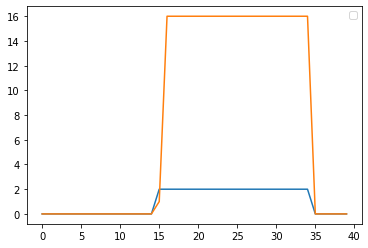

In [4]:
#Test step by step
z = []
idx = 1

x_train, y_train, test_size = data_loader.get_test_data_sequence()
final_hidden_state = []
final_carry_state = []

for i in range(len(x_train[idx])):
    if i==0:        
        initial_hidden_state_value = np.zeros(shape=(1, 29, 39, 20), dtype=float)
        initial_carry_state_value = np.zeros(shape=(1, 29, 39, 20), dtype=float)
    else:
        initial_hidden_state_value = final_hidden_state
        initial_carry_state_value = final_carry_state
    last_layer, final_hidden_state, final_carry_state = sess.run([nn_last_layer, hidden_state, carry_state], 
                                feed_dict={input_image: [[x_train[idx][i]]], initial_hidden_state: initial_hidden_state_value, initial_carry_state: initial_carry_state_value})
    #plt.imshow(x_train[idx][i])
    #plt.show()
    g = np.argmax(last_layer.reshape(-1), 0)    
    z.append(g)
    
print(np.argmax(y_train[idx, :, :], axis=1))
print(z)
plt.plot(np.argmax(y_train[idx, :, :], axis=1))
plt.plot(z)
plt.legend('true', 'lstm')
plt.show()
    
    

/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-pack

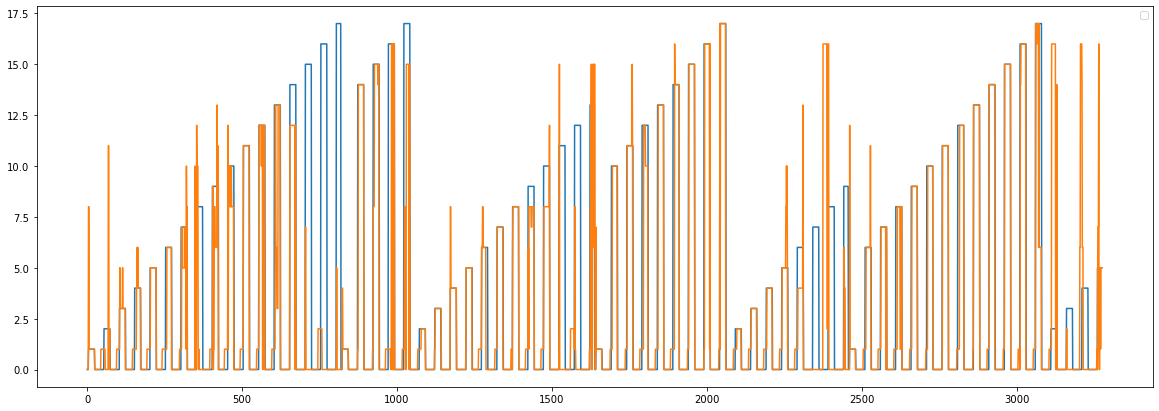

In [11]:
#run full sequence

initial_hidden_state_value = np.zeros(shape=(1, 29, 39, 20), dtype=float)
initial_carry_state_value = np.zeros(shape=(1, 29, 39, 20), dtype=float)

truth_list = []
prediction_list = []
prev_truth = 0

for image, contact_status in data_loader.get_full_data_sequence():
    
    #print(np.shape(image))
    
    last_layer, final_hidden_state, final_carry_state = sess.run([nn_last_layer, hidden_state, carry_state], 
                                feed_dict={input_image: image, initial_hidden_state: initial_hidden_state_value, initial_carry_state: initial_carry_state_value})
    
    if (prev_truth > 0) and contact_status==0:
        initial_hidden_state_value = np.zeros(shape=(1, 29, 39, 20), dtype=float)
        initial_carry_state_value = np.zeros(shape=(1, 29, 39, 20), dtype=float)
    else:        
        initial_hidden_state_value = final_hidden_state    
        initial_carry_state_value = final_carry_state
    
    truth_list.append(contact_status) 
    prev_truth = contact_status
    
    
    prediction = np.argmax(last_layer.reshape(-1), 0)   
    prediction_list.append(prediction)
    

plt.figure(figsize=(20,7))
plt.plot(truth_list)
plt.plot(prediction_list)
plt.legend('true', 'lstm')
plt.show()

/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  after removing the cwd from sys.path.
/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-prox

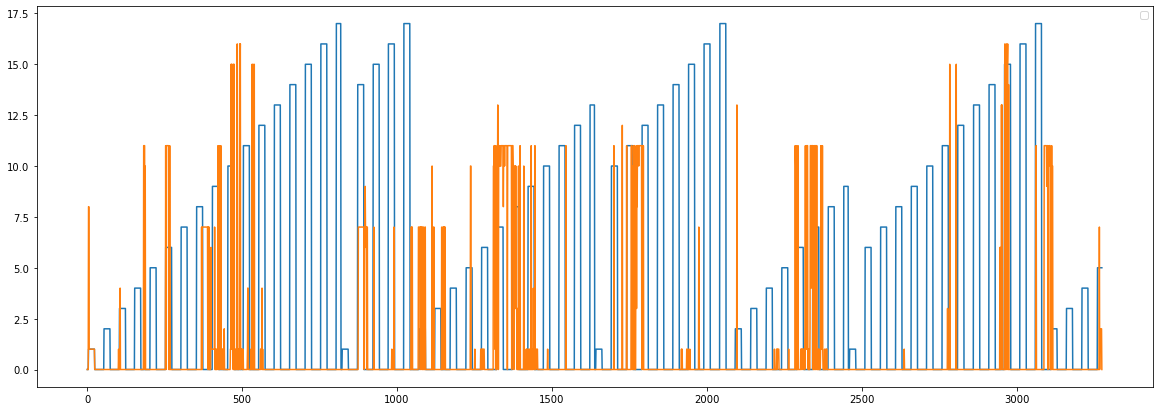

In [9]:
plt.figure(figsize=(20,7))
plt.plot(truth_list)
plt.plot(prediction_list)
plt.legend('true', 'lstm')
plt.show()

In [ ]:
plt.imshow(x_train[idx][0])

In [ ]:
print(g.eval())

In [ ]:
x = tf2.ones(shape=(5, 3, 5))
print(tf.shape(x))
print(tf.shape(x[:,-1,:]))

In [5]:
logits = [[4.0, 2.0, 1.0], [0.0, 5.0, 1.0]]
labels = [[1.0, 0.0, 0.0], [0.0, 0.8, 0.2]]
tf2.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits)



<tf.Tensor 'softmax_cross_entropy_with_logits_1/Reshape_2:0' shape=(2,) dtype=float32>